In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns
from scipy import stats

In [100]:
df = pd.read_csv(r"C:\Users\babur\OneDrive\Desktop\DAI-101\A-1\movies_data.csv", encoding='latin1')
print(df.head())


              Movie        Director  Running time          Actor 1  \
0          13 Hours     Michael Bay           144    Toby Stephens   
1         16 Blocks  Richard Donner           102     Bruce Willis   
2          17 Again     Burr Steers           102    Matthew Perry   
3              1982    Tommy Oliver            90  Bokeem Woodbine   
4  2 Fast 2 Furious  John Singleton           107      Paul Walker   

            Actor 2          Actor 3   Genre    Budget  Box Office  \
0  James Badge Dale  David Costabile  Action  50000000    69400000   
1       David Zayas       Sasha Roiz  Action  52000000    65000000   
2    Hunter Parrish    Thomas Lennon  Comedy  20000000   139000000   
3          Ruby Dee    Quinton Aaron   Drama   1000000     2000000   
4       Cole Hauser       Mo Gallini  Action  76000000   236000000   

   Actors Box Office %  Director Box Office %   Earnings  \
0                50.00                  69.23   19400000   
1                33.33                

In [101]:
df = df.dropna()

# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Genre', 'Director'], drop_first=True)

print(df_encoded.head())

              Movie  Running time          Actor 1           Actor 2  \
0          13 Hours           144    Toby Stephens  James Badge Dale   
1         16 Blocks           102     Bruce Willis       David Zayas   
2          17 Again           102    Matthew Perry    Hunter Parrish   
3              1982            90  Bokeem Woodbine          Ruby Dee   
4  2 Fast 2 Furious           107      Paul Walker       Cole Hauser   

           Actor 3    Budget  Box Office  Actors Box Office %  \
0  David Costabile  50000000    69400000                50.00   
1       Sasha Roiz  52000000    65000000                33.33   
2    Thomas Lennon  20000000   139000000                44.44   
3    Quinton Aaron   1000000     2000000                50.00   
4       Mo Gallini  76000000   236000000                75.00   

   Director Box Office %   Earnings  ...  Director_Wych Kaosayananda  \
0                  69.23   19400000  ...                       False   
1                  50.00   13000

In [102]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3969 entries, 0 to 3973
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie                                3969 non-null   object 
 1   Director                             3969 non-null   object 
 2   Running time                         3969 non-null   int64  
 3   Actor 1                              3969 non-null   object 
 4   Actor 2                              3969 non-null   object 
 5   Actor 3                              3969 non-null   object 
 6   Genre                                3969 non-null   object 
 7   Budget                               3969 non-null   int64  
 8   Box Office                           3969 non-null   int64  
 9   Actors Box Office %                  3969 non-null   float64
 10  Director Box Office %                3969 non-null   float64
 11  Earnings                           

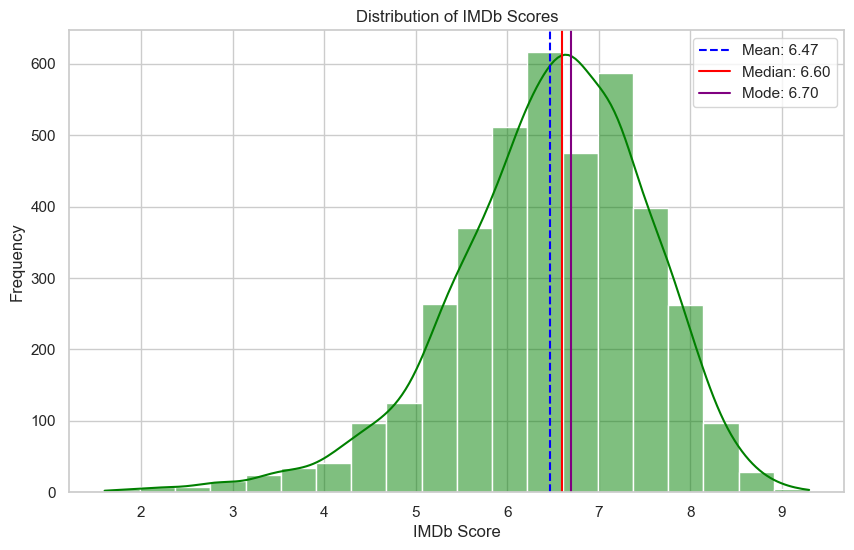

In [103]:
sns.set(style="whitegrid")

# Calculate mean, median, and mode
mean_imdb = df['IMDb score'].mean()
median_imdb = df['IMDb score'].median()
mode_imdb = df['IMDb score'].mode()[0]  # mode() returns a series, so get the first mode

# Plot the histogram of IMDb Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb score'], bins=20, kde=True, color='green')

# Add mean, median, and mode to the plot as vertical lines
plt.axvline(mean_imdb, color='blue', linestyle='--', label=f'Mean: {mean_imdb:.2f}')
plt.axvline(median_imdb, color='red', linestyle='-', label=f'Median: {median_imdb:.2f}')
plt.axvline(mode_imdb, color='purple', linestyle='-', label=f'Mode: {mode_imdb:.2f}')

# Add titles and labels
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')

# Add a legend to show the values of mean, median, and mode
plt.legend()

# Show the plot
plt.show()

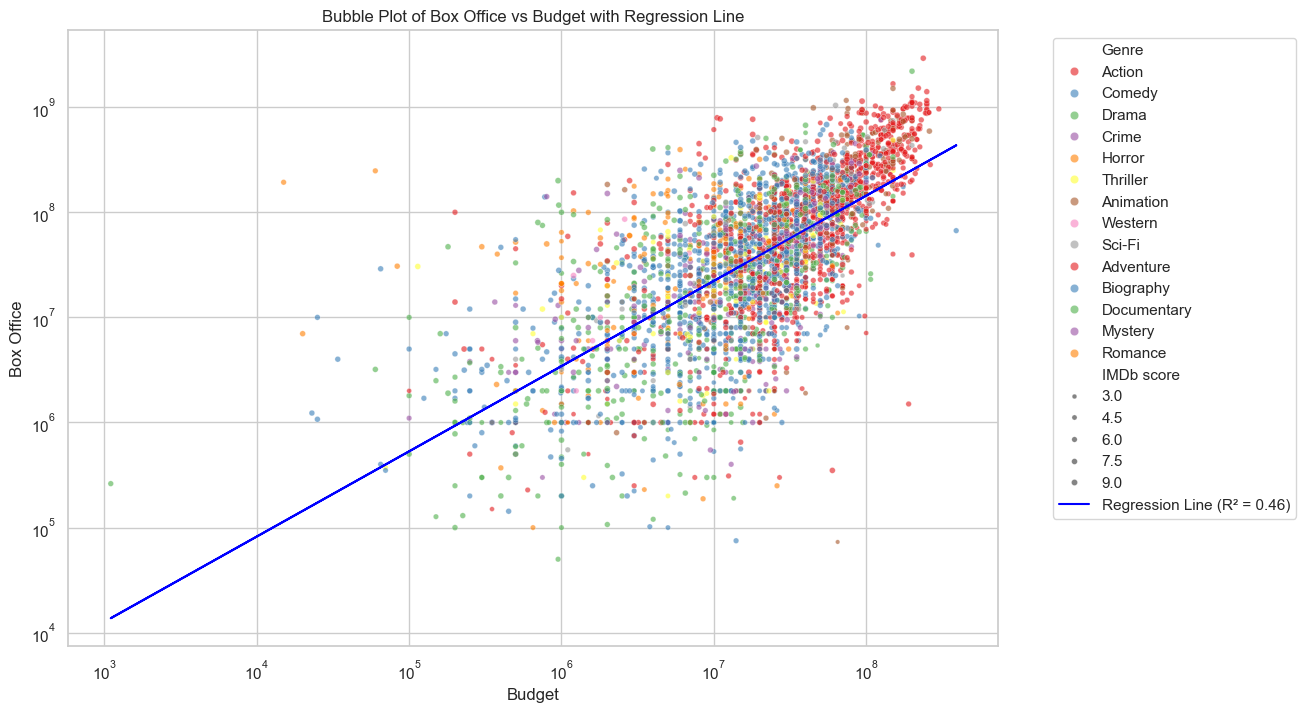

Slope (log-log): 0.8107521652188405
Intercept (log-log): 1.6718535098088791
R²: 0.4583328794142394


In [104]:
X = df[['Budget']]  
y = df['Box Office'] 
# Log-transform for linear regression if necessary
X_log = np.log10(X)
y_log = np.log10(y)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_log, y_log)

# Predict values based on the model
y_pred = model.predict(X_log)

# Get regression parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X_log, y_log)

# Plot scatterplot with regression line
plt.figure(figsize=(12, 8))

# Scatterplot (Bubble plot)
sns.scatterplot(x='Budget', y='Box Office', size='IMDb score', sizes=(10,20), hue='Genre', palette='Set1', alpha=0.6, data=df)

# Overlay regression line
plt.plot(X, 10**y_pred, color='blue', label=f'Regression Line (R² = {r_squared:.2f})')

# Titles and labels
plt.xscale('log')
plt.yscale('log')
plt.title('Bubble Plot of Box Office vs Budget with Regression Line')
plt.xlabel('Budget')
plt.ylabel('Box Office')

# Move the legend out of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Display regression results
print(f"Slope (log-log): {slope}")
print(f"Intercept (log-log): {intercept}")
print(f"R²: {r_squared}")


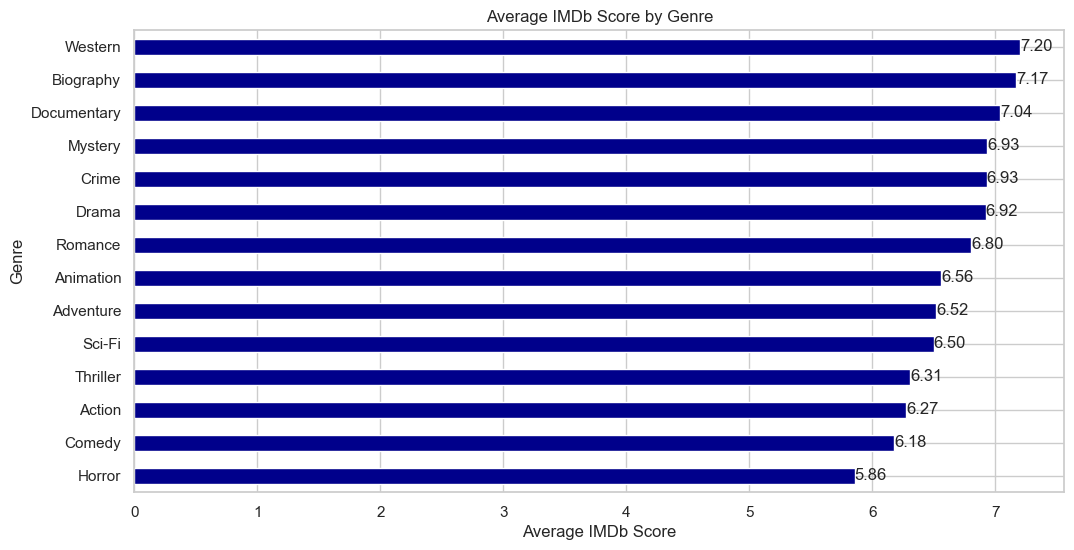

In [105]:
average_score_by_genre = df.groupby('Genre')['IMDb score'].mean().sort_values()

# Bar chart for average IMDb score by genre
plt.figure(figsize=(12, 6))
ax=average_score_by_genre.plot(kind='barh', color='darkblue')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
for index, value in enumerate(average_score_by_genre):
    ax.text(value, index, f'{value:.2f}', va='center')
plt.show()

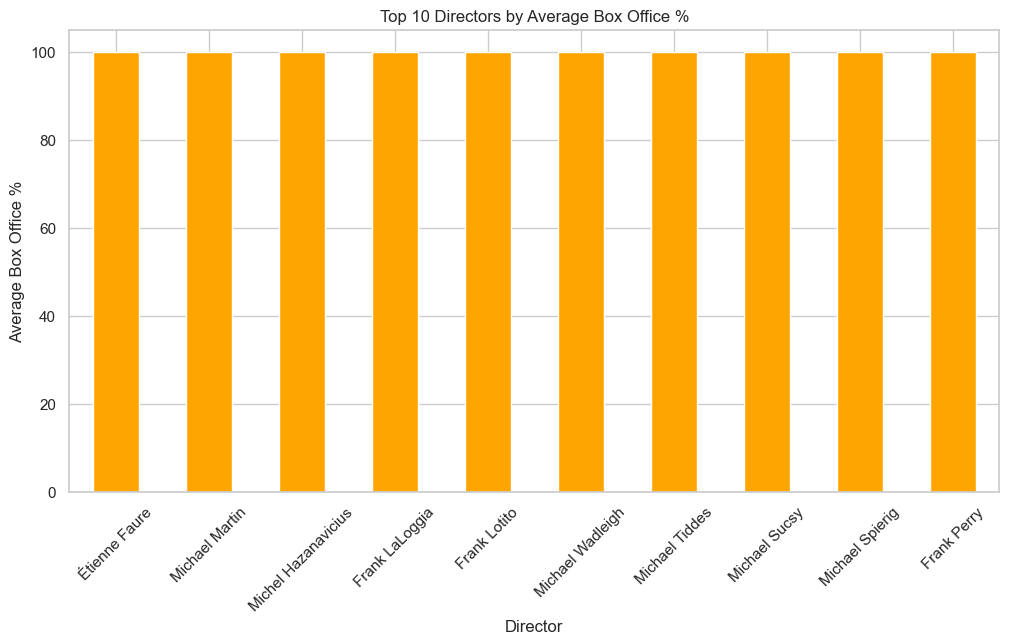

In [106]:
# Calculate the average director box office percentage
average_director_success = df.groupby('Director')['Director Box Office %'].mean().sort_values(ascending=False)

# Bar chart for average director box office percentage
plt.figure(figsize=(12, 6))
average_director_success.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Directors by Average Box Office %')
plt.xlabel('Director')
plt.ylabel('Average Box Office %')
plt.xticks(rotation=45)
plt.show()

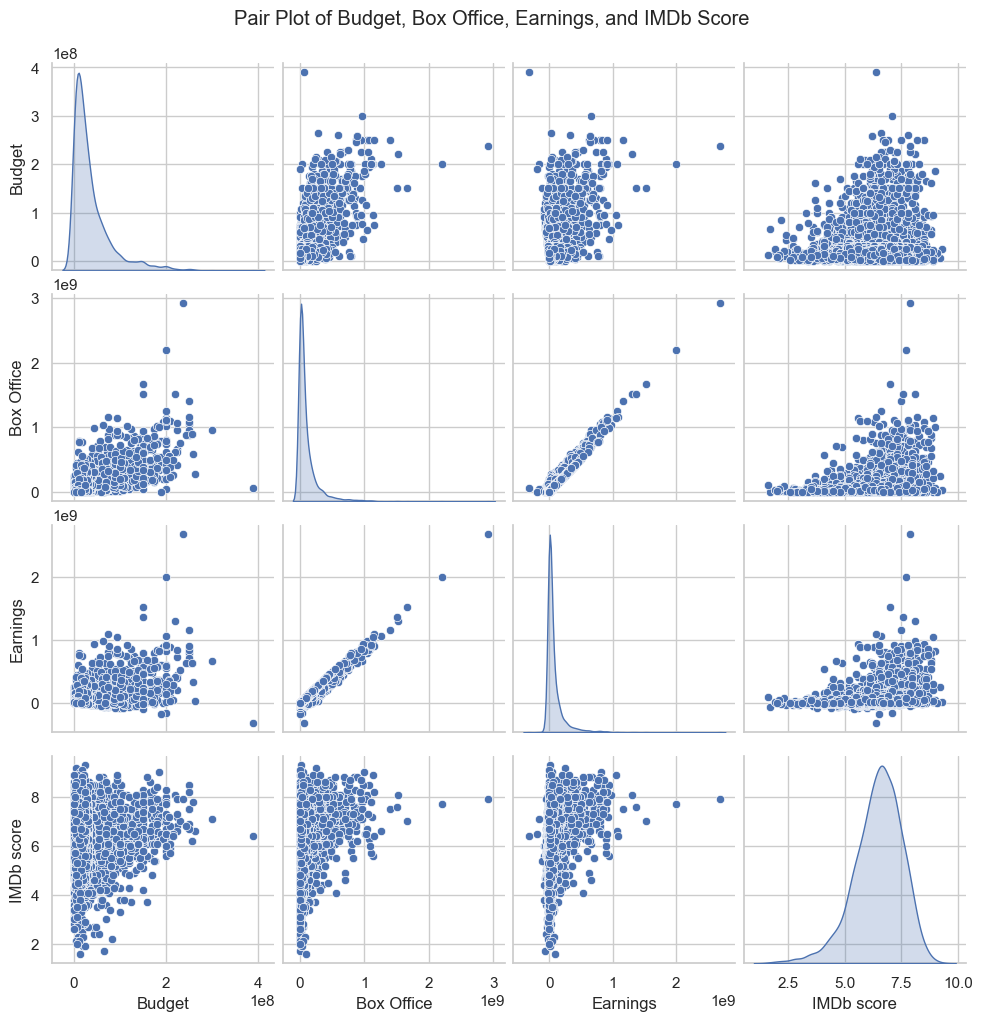

In [107]:
sns.pairplot(df, vars=['Budget', 'Box Office', 'Earnings', 'IMDb score'], diag_kind='kde')
plt.suptitle('Pair Plot of Budget, Box Office, Earnings, and IMDb Score', y=1.02)
plt.show()

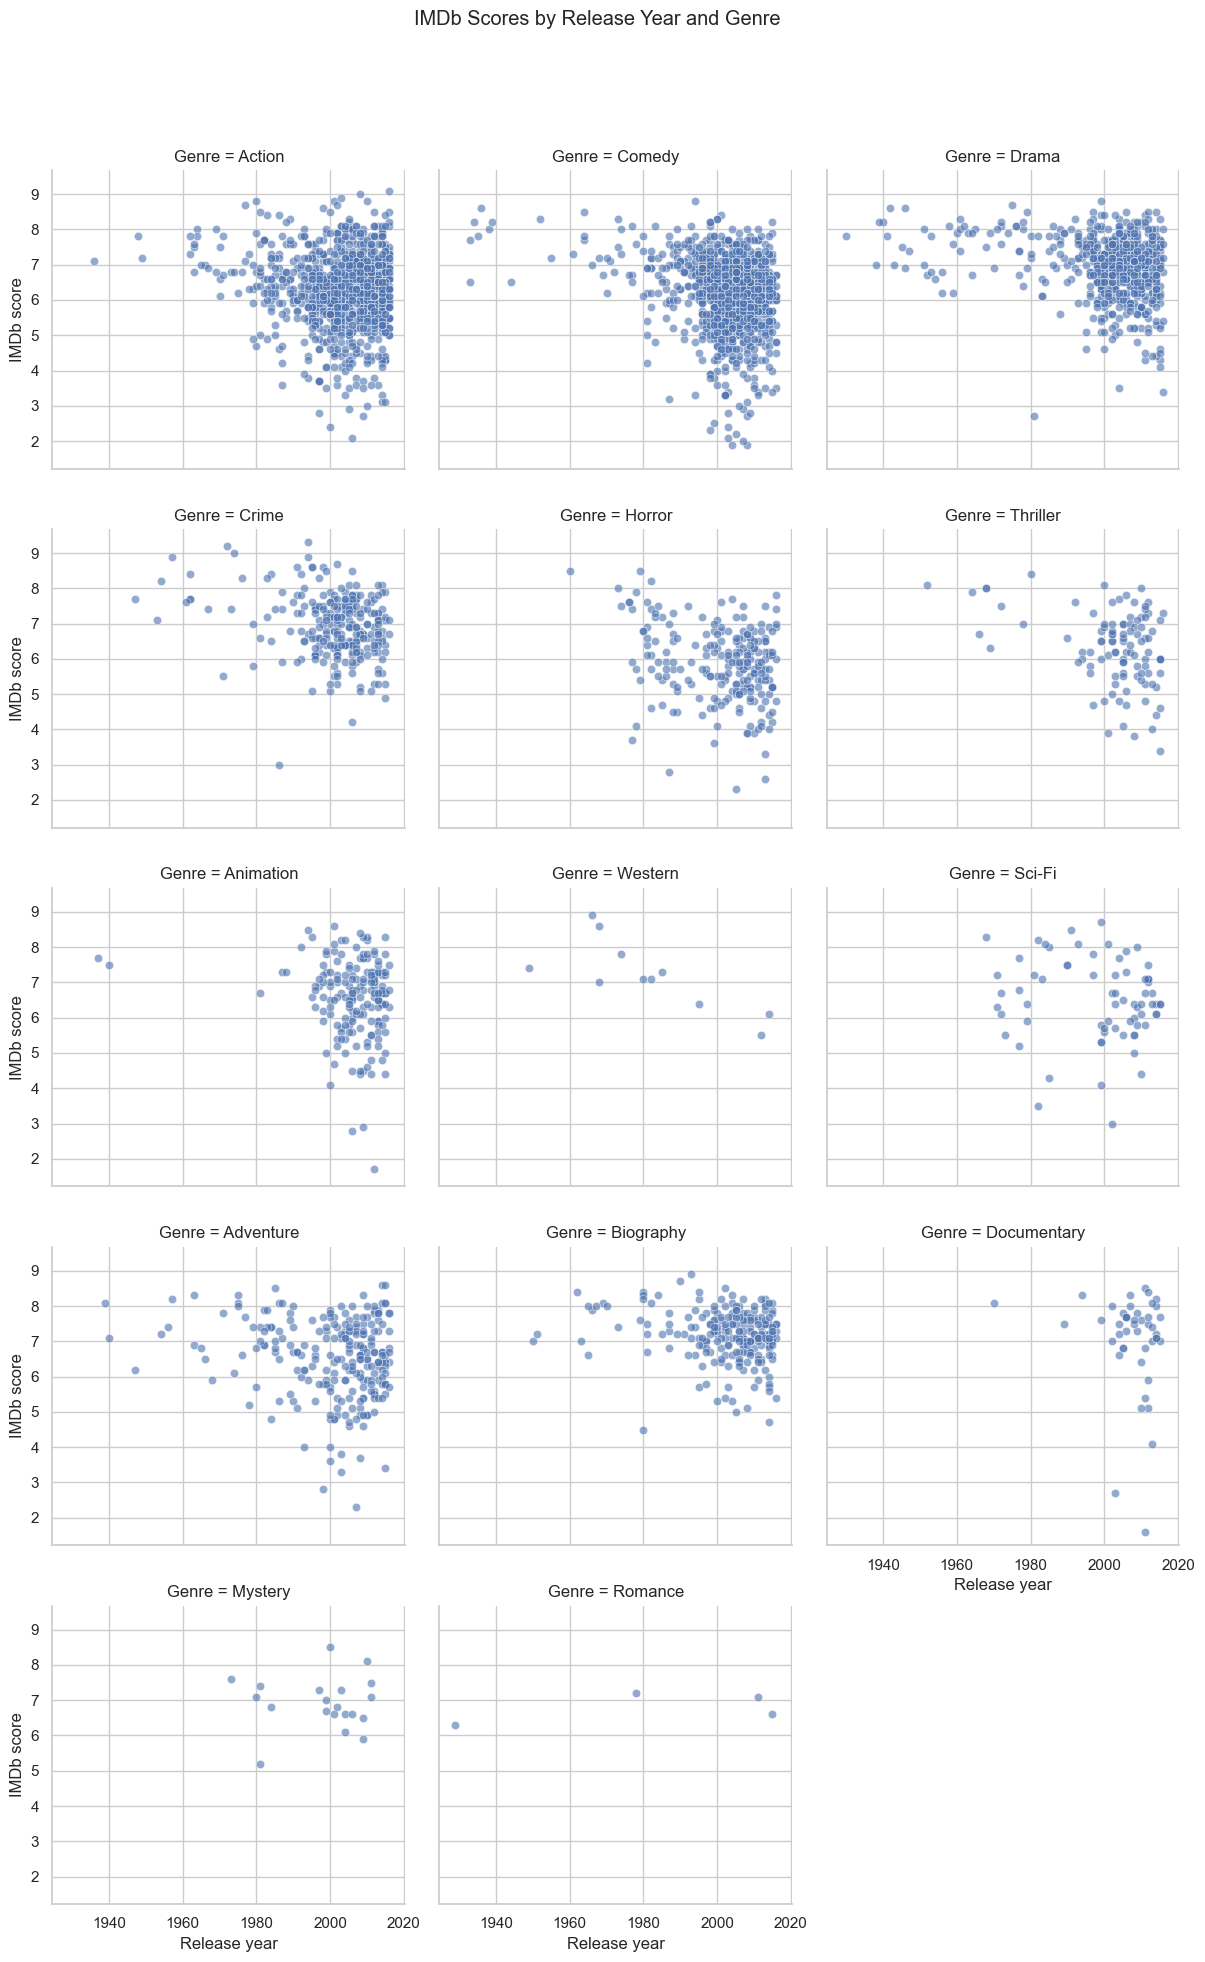

In [108]:
# Facet Grid to visualize IMDb Scores by Release Year and Genre
g = sns.FacetGrid(df, col='Genre', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Release year', 'IMDb score', alpha=0.6)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('IMDb Scores by Release Year and Genre')
plt.show()